## Enter your names here
Name 1: Reyhan Açıkgöz

Name 2: Emirhan Topal

In [102]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Loading Data 

In [103]:
background = pd.read_csv("Background.csv")
grades = pd.read_csv("Grades.csv")

In [104]:
grades = grades.rename(columns={"math score": "math", "reading score": "reading", "writing score": "writing"})

In [105]:
grades.head(5)

,ID,math,reading,writing
0,0,72,72,74
1,1,69,90,88
2,2,90,95,93
3,3,47,57,44
4,4,76,78,75


In [106]:
background.head(5)

,ID,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,female,group B,bachelor's degree,standard,none
1,1,female,group C,some college,standard,completed
2,2,female,group B,master's degree,standard,none
3,3,male,group A,associate's degree,free/reduced,none
4,4,male,group C,some college,standard,none


# 2. 

In [107]:
#Calculate and add “average" score to grades

grades = grades.assign(average=grades["math"] * 0.5 + grades["reading"] * 0.3 + grades["writing"] * 0.2)

grades.head(5)

,ID,math,reading,writing,average
0,0,72,72,74,72.4
1,1,69,90,88,79.1
2,2,90,95,93,92.1
3,3,47,57,44,49.4
4,4,76,78,75,76.4


# 3. 

In [108]:
grades.groupby((grades["average"] > 50) & (grades["math"] < 50)).get_group(True).head()

,ID,math,reading,writing,average
69,69,39,64,57,50.1
162,162,49,53,52,50.8
176,176,46,54,58,50.8
181,181,46,64,66,55.4
212,212,42,62,60,51.6


# 4. 

Text(0, 0.5, 'reading score')

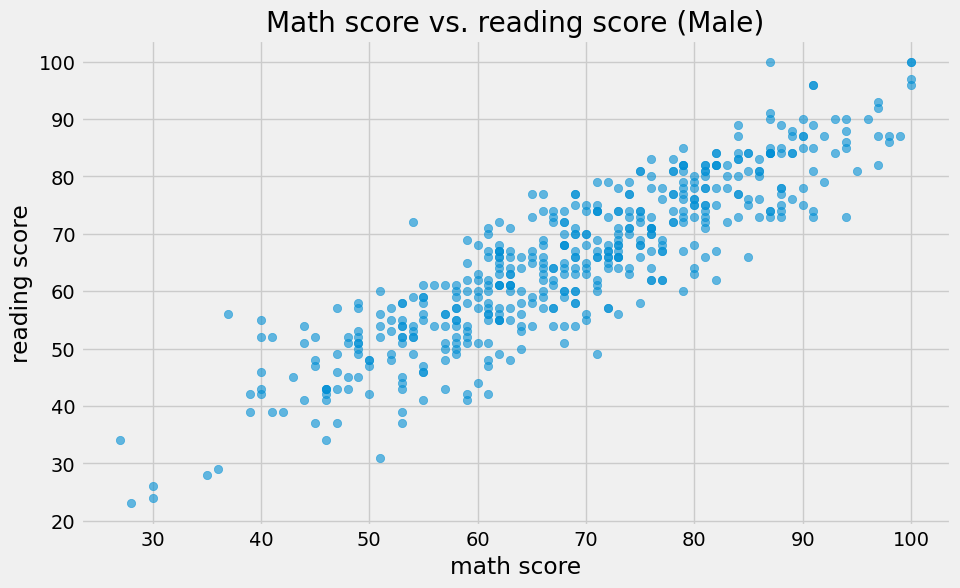

In [109]:
#Scatter plots
df_merged = pd.merge(background, grades, on='ID')

df_male = df_merged[df_merged['gender'] == 'male']
df_female = df_merged[df_merged['gender'] == 'female']

plt.figure(figsize=(10, 6))

plt.scatter(df_male['math'], df_male['reading'], alpha=0.6, label='Erkek')

plt.title('Math score vs. reading score (Male)')
plt.xlabel('math score')
plt.ylabel('reading score')

Briefly discuss results here

Both male and female students show a positive relationship between math and reading scores —
as math scores increase, reading scores tend to increase as well.
The points for both genders roughly follow an upward trend,
indicating that students who perform well in math are also likely to perform well in reading.

There might be slight variations in distribution — for example, female students may show slightly higher reading scores on average.

# 5. 

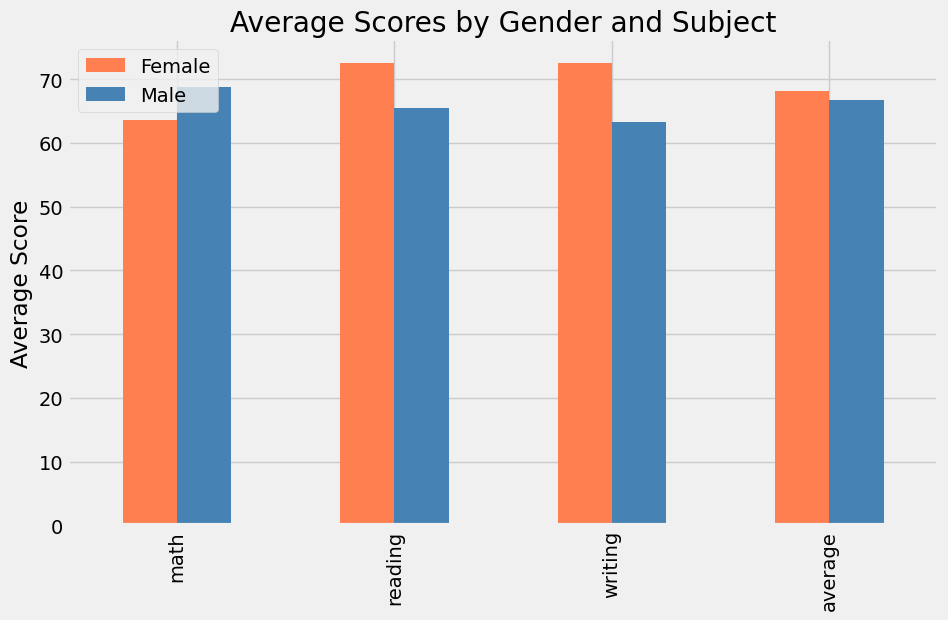

In [110]:
grouped = df_merged.groupby("gender")[["math", "reading", "writing", "average"]].mean()
grouped.T.plot(kind="bar", figsize=(10,6), color=["#FF7F50", "#4682B4"])

plt.title("Average Scores by Gender and Subject")
plt.ylabel("Average Score")
plt.legend(["Female", "Male"])

# 6. 

In [111]:
#add "letter grade" columns
def get_letter_grade(score):
    if 90 <= score <= 100:
        return "AA"
    elif 85 <= score < 90:
        return "BA"
    elif 80 <= score < 85:
        return "BB"
    elif 70 <= score < 80:
        return "CB"
    elif 60 <= score < 70:
        return "CC"
    elif 55 <= score < 60:
        return "DC"
    elif 50 <= score < 55:
        return "DD"
    else:
        return "F"

grades["Letter Grade"] = grades["average"].apply(get_letter_grade)

grades.head(5)

,ID,math,reading,writing,average,Letter Grade
0,0,72,72,74,72.4,CB
1,1,69,90,88,79.1,CB
2,2,90,95,93,92.1,AA
3,3,47,57,44,49.4,F
4,4,76,78,75,76.4,CB


Text(0, 0.5, 'Count')

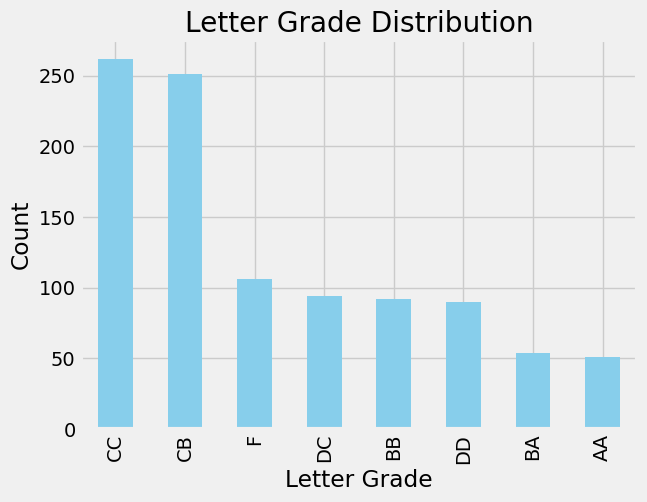

In [112]:
# distribution of letter grades
grades["Letter Grade"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Letter Grade Distribution")
plt.xlabel("Letter Grade")
plt.ylabel("Count")

# 7. 

<Axes: title={'center': 'A Grade Percentage by Race/Ethnicity'}, xlabel='race/ethnicity', ylabel='Percentage of A Grades'>

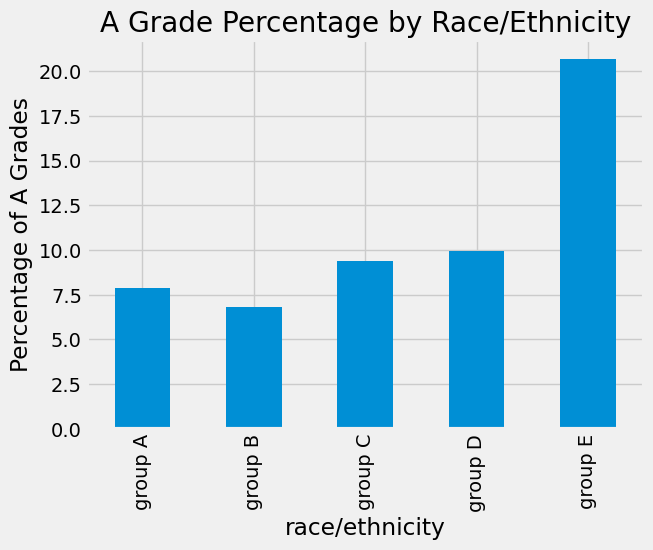

In [113]:
merged = pd.merge(grades, background, on="ID")

a_students = merged[merged["Letter Grade"].isin(["AA", "BA"])]

total = merged.groupby("race/ethnicity").size()
a_count = a_students.groupby("race/ethnicity").size()

percent_a = (a_count / total) * 100

percent_a.plot(kind="bar", ylabel="Percentage of A Grades", title="A Grade Percentage by Race/Ethnicity")

# 8. 

Text(0.5, 1.0, 'Percentage of Students with BB or Higher Grades')

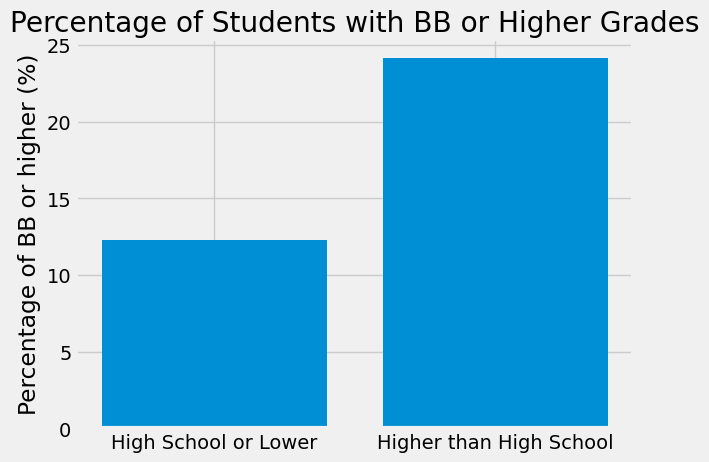

In [114]:
high_grades = ["AA", "BA", "BB"]
low_grades = ["CB", "CC", "DC", "DD", "F"]

higher_edu = merged[merged["parental level of education"].isin([
    "some college", "associate's degree", "bachelor's degree", "master's degree"
])]

lower_edu = merged[merged["parental level of education"].isin([
    "some high school", "high school"
])]

higher_bb = (higher_edu["Letter Grade"].isin(high_grades).sum() / len(higher_edu)) * 100
lower_bb = (lower_edu["Letter Grade"].isin(high_grades).sum() / len(lower_edu)) * 100


data = pd.DataFrame({
    "Higher than High School": [higher_bb],
    "High School or Lower": [lower_bb]
}, index=["BB or higher", "CB or lower"])

plt.bar(["High School or Lower", "Higher than High School"], [lower_bb, higher_bb])
plt.ylabel("Percentage of BB or higher (%)")
plt.title("Percentage of Students with BB or Higher Grades")

# 9. 

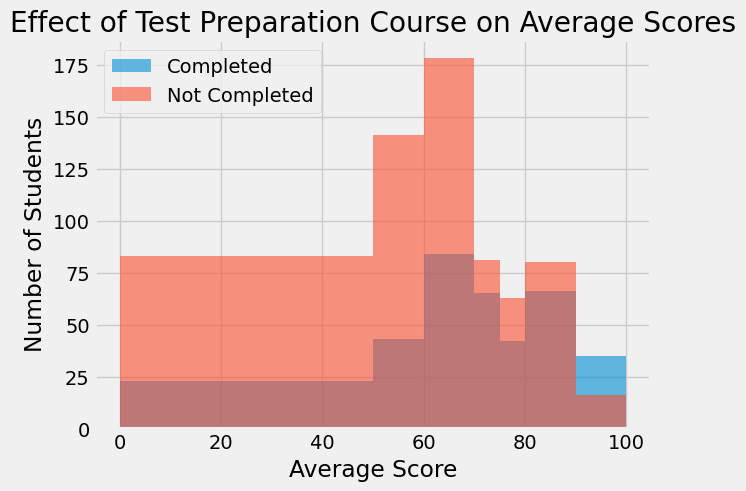

In [115]:
bins = [0, 50, 60, 70, 75, 80, 90, 100]

completed = merged[merged["test preparation course"] == "completed"]
none = merged[merged["test preparation course"] == "none"]

plt.hist(completed["average"], bins=bins, alpha=0.6, label="Completed")
plt.hist(none["average"], bins=bins, alpha=0.6, label="Not Completed")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.title("Effect of Test Preparation Course on Average Scores")
plt.legend()


Briefly discuss the results here

Students who completed the test preparation course tend to have higher average scores compared to those who did not.
The histogram shows that most of the students who did not complete the course have scores concentrated between 60–75,
while the students who completed the course mostly fall in the 75–90 range.

This suggests that the test preparation course had a positive impact on students’ performance, helping them achieve higher average scores overall.

# 10. 

In [116]:
merged["is_fail"] = merged["Letter Grade"] == "F"

failure_rate = merged.pivot_table(
    index="race/ethnicity",
    columns="parental level of education",
    values="is_fail",
    aggfunc="mean"
) * 100
failure_rate

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,28.571429,0.000000,16.666667,0.000000,16.666667,29.166667
group B,9.756098,5.000000,18.750000,0.000000,13.513514,21.052632
group C,6.410256,5.000000,15.625000,10.526316,8.695652,18.367347
group D,4.000000,10.714286,15.909091,4.347826,2.985075,6.000000
group E,7.692308,5.555556,9.090909,0.000000,2.857143,16.666667


# 11. 

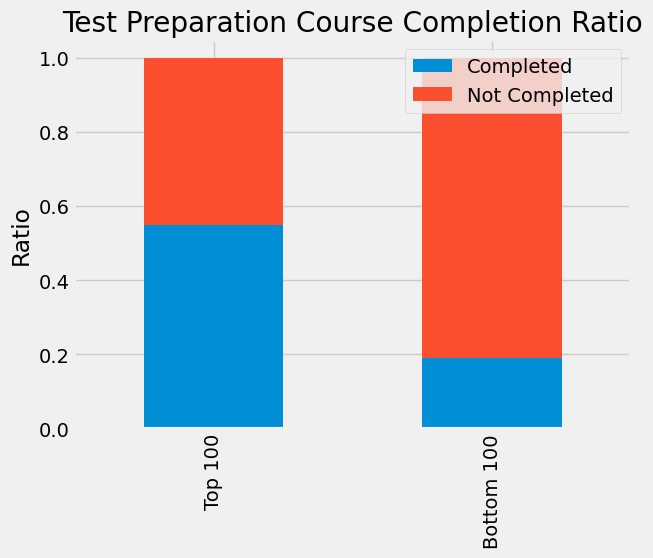

In [117]:
#compare test preparation course completion ratio
sorted_df = merged.sort_values(by="average", ascending=False)
top_100 = sorted_df.head(100)
bottom_100 = sorted_df.tail(100)

prep_ratio = pd.DataFrame({
    "Completed": [top_100["test preparation course"].eq("completed").mean(),
                  bottom_100["test preparation course"].eq("completed").mean()],
    "Not Completed": [top_100["test preparation course"].eq("none").mean(),
                      bottom_100["test preparation course"].eq("none").mean()]
}, index=["Top 100", "Bottom 100"])

prep_ratio.plot(kind="bar", stacked=True)
plt.title("Test Preparation Course Completion Ratio")
plt.ylabel("Ratio")
plt.show()

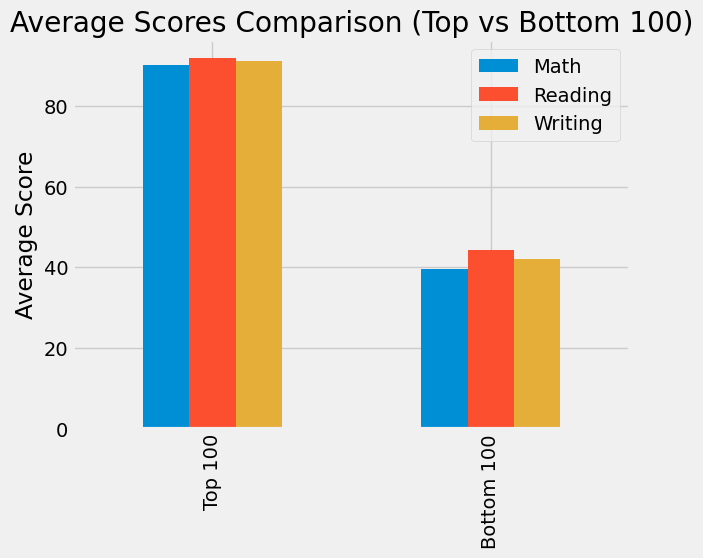

In [101]:
#compare average math, reading and writing scores
avg_scores = pd.DataFrame({
    "Math": [top_100["math"].mean(), bottom_100["math"].mean()],
    "Reading": [top_100["reading"].mean(), bottom_100["reading"].mean()],
    "Writing": [top_100["writing"].mean(), bottom_100["writing"].mean()]
}, index=["Top 100", "Bottom 100"])

avg_scores.plot(kind="bar")
plt.title("Average Scores Comparison (Top vs Bottom 100)")
plt.ylabel("Average Score")
plt.show()